The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [115]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nobel = pd.read_csv("data/nobel.csv")
nobel

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN


### What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.

#### Gender


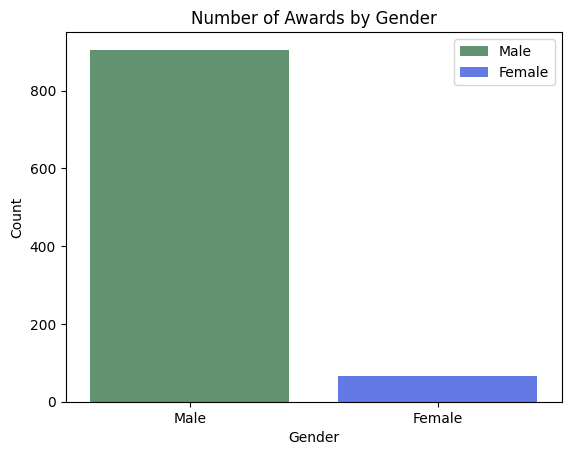

In [116]:
colors = ["#5A9A6F", "#4D6CFA"]

sns.countplot(x='sex', data=nobel, order=nobel_data['sex'].value_counts().index, hue = "sex", palette=colors)
plt.title('Number of Awards by Gender')
plt.legend(title='', loc='upper right')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

top_gender = nobel['sex'].mode().iloc[0]

#### Countries

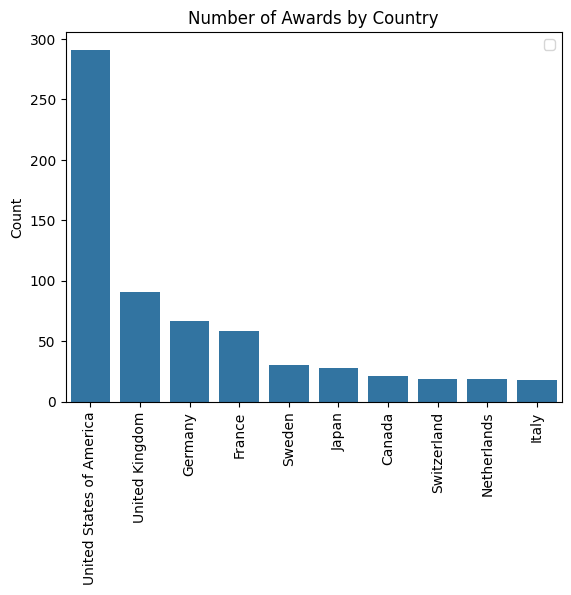

United States of America


In [117]:
sns.countplot(x='birth_country', data=nobel, order=nobel['birth_country'].value_counts().index[:10],)
plt.title('Number of Awards by Country')
plt.ylabel('Count')
plt.xlabel('')
plt.legend(title='', loc='upper right')
plt.xticks(rotation=90)
plt.show()

top_country = nobel['birth_country'].mode().iloc[0]
print(top_country)

### What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000


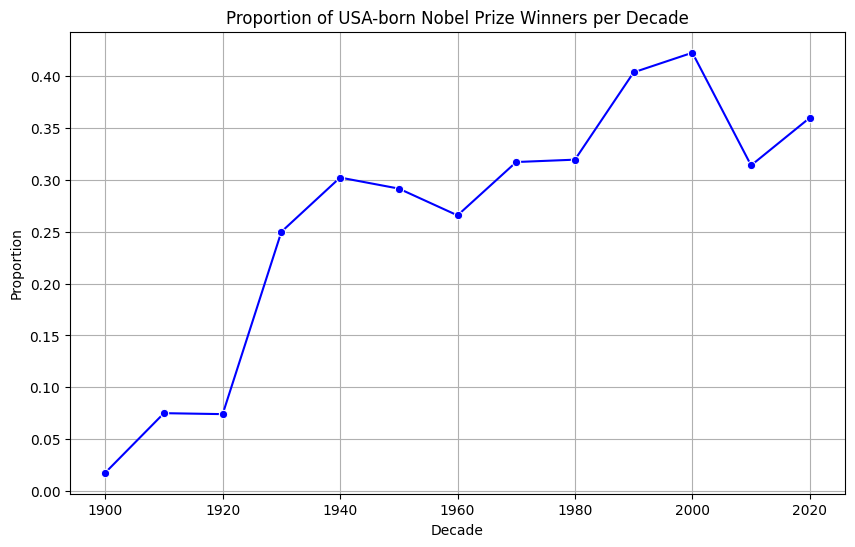

In [118]:
nobel['usa_born_winner'] = nobel["birth_country"] == "United States of America"
nobel['decade'] = (nobel["year"] // 10 * 10).astype(int)
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Display the result
print(prop_usa_winners)

plt.figure(figsize=(10, 6))
sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners, marker='o', color='blue')
plt.title('Proportion of USA-born Nobel Prize Winners per Decade')
plt.xlabel('Decade')
plt.ylabel('Proportion')
plt.grid(True)
plt.show()

In [119]:
max_decade_usa =  prop_usa_winners.loc[prop_usa_winners['usa_born_winner'].idxmax()]['decade']
max_decade_usa = 2000

### What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.

In [120]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
max_female_dict

{2020: 'Literature'}

### Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

In [121]:
# Find the first woman to receive a Nobel Prize
first_woman = nobel[nobel['sex'] == 'Female'].sort_values(by='year').iloc[0]

# Extract the name and category of the first woman
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

# Display the results
print("The first woman to receive a Nobel Prize was:", first_woman_name)
print("She received it in the category of:", first_woman_category)

The first woman to receive a Nobel Prize was: Marie Curie, née Sklodowska
She received it in the category of: Physics


### Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.

In [122]:
repeat_prizes = nobel.groupby(['full_name']).size()
repeat_list = repeat_prizes[repeat_prizes > 1].index.tolist()
print("The following individuals or organizations have won multiple Nobel Prizes:")
for name in repeat_list:
    print(name)


The following individuals or organizations have won multiple Nobel Prizes:
Comité international de la Croix Rouge (International Committee of the Red Cross)
Frederick Sanger
John Bardeen
Linus Carl Pauling
Marie Curie, née Sklodowska
Office of the United Nations High Commissioner for Refugees (UNHCR)
